# U.S. Medical Insurance Costs

In [1]:
#Medical Insurance Costs project
#Import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

us_insurance_df = pd.read_csv(r"C:\Users\Luis\Downloads\python-portfolio-project-US-medical\python-portfolio-project-starter-files\insurance.csv")


In [2]:
#First we plot the fisrt 5 rows to see wich variables we have
print(us_insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#Look for the type of the variables we have
print(us_insurance_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
#Types seems to be correct
#Check for ammount of individuals
qty_indv = len(us_insurance_df['age'])
print('The ammount of patients at the study are', qty_indv)

The ammount of individuals are 1338


In [5]:
#Check the ammount of females and males
total_sex = us_insurance_df['sex'].value_counts()
print(total_sex)
#Check the average age for each sex
total_age = us_insurance_df.groupby(['sex'])['age'].sum()
avg_male_age = total_age[0]/total_sex[0]
avg_female_age = total_age[1]/total_sex[1]
print('Average age for males of the data is', avg_male_age)
print('Average age for females of the data is', avg_female_age)

sex
male      676
female    662
Name: count, dtype: int64
Average age for males of the data is 38.68491124260355
Average age for females of the data is 39.740181268882175


In [6]:
#Check the total bmi for each sex
total_bmi = us_insurance_df.groupby(['sex'])['bmi'].sum()
avg_male_bmi = total_bmi[0]/total_sex[0]
print('Average BMI for males is', avg_male_bmi)
avg_female_bmi = total_bmi[1]/total_sex[1]
print('Average BMI for females is', avg_female_bmi)

#Check which sex has a higher BMI
if avg_male_bmi > avg_female_bmi:
    print('On this data BMI on males tends to be higher than for females')
else:
    print('On this data BMI on females tends to be higher than for males')

Average BMI for males is 29.74862426035503
Average BMI for females is 31.597515105740182
On this data BMI on females tends to be higher than for males


In [7]:
#Use get_dummies to find the correlation matrix
corr = pd.get_dummies(us_insurance_df, columns = ['sex','smoker','region'])
corr.corr()
#The variables which have a higher correlation between them are 'charges' and 'smoker'

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


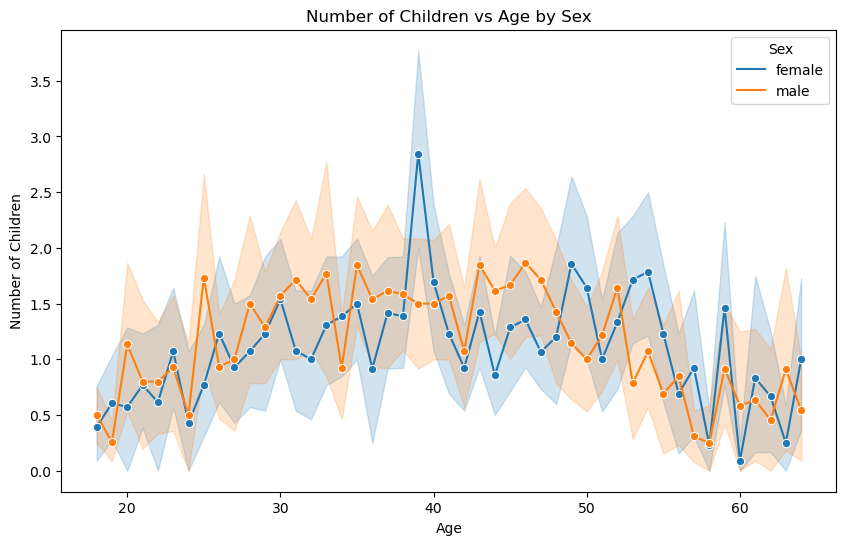

5


In [8]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.lineplot(x="age", y="children", hue="sex", data=us_insurance_df, marker = 'o')
#Customize the chart
plt.title('Number of Children vs Age by Sex')
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.legend(title='Sex')
plt.show()
print(us_insurance_df['children'].max())

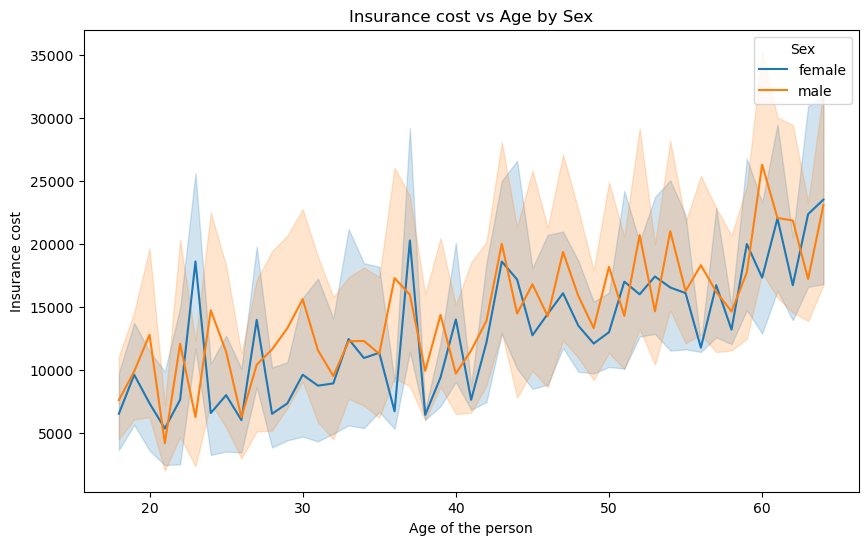

In [9]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.lineplot(x="age", y="charges", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Insurance cost vs Age by Sex')
plt.xlabel('Age of the person')
plt.ylabel('Insurance cost')
plt.legend(title='Sex')
plt.show()

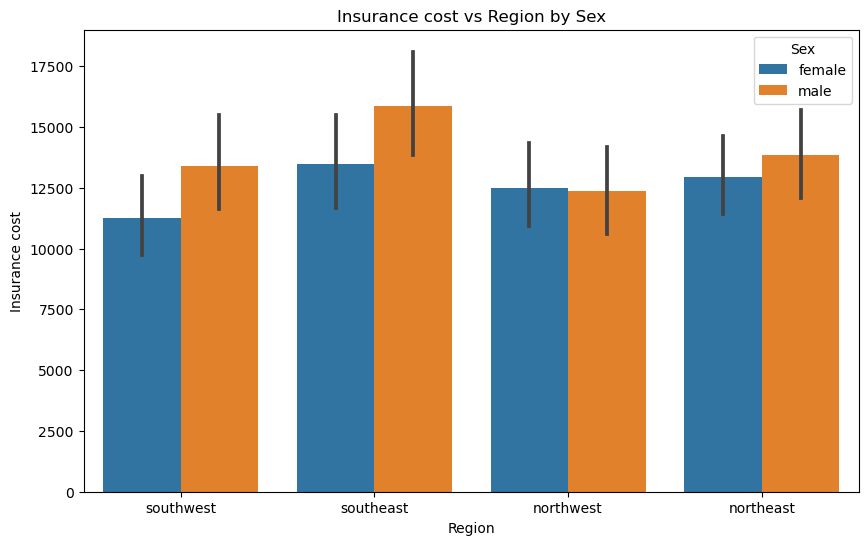

In [10]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.barplot(x="region", y="charges", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Insurance cost vs Region by Sex')
plt.xlabel('Region')
plt.ylabel('Insurance cost')
plt.legend(title='Sex')
plt.show()

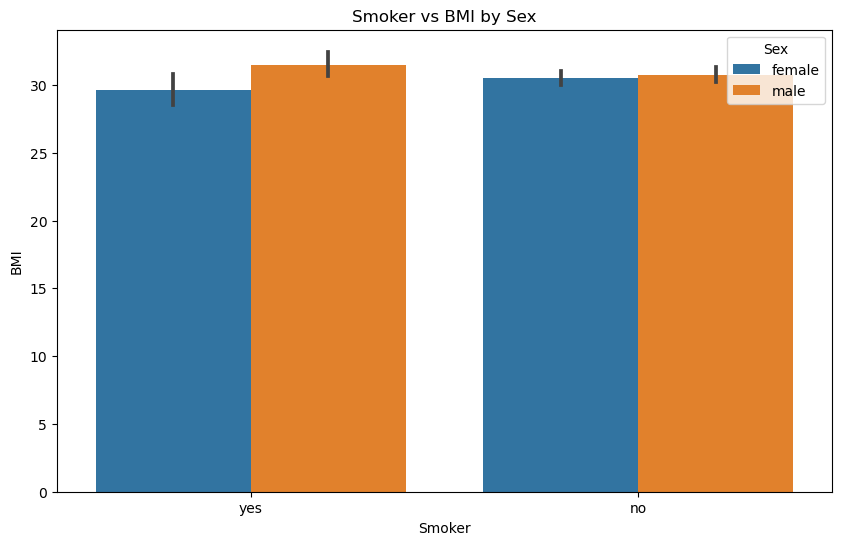

In [11]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.barplot(x="smoker", y="bmi", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Smoker vs BMI by Sex')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.legend(title='Sex')
plt.show()

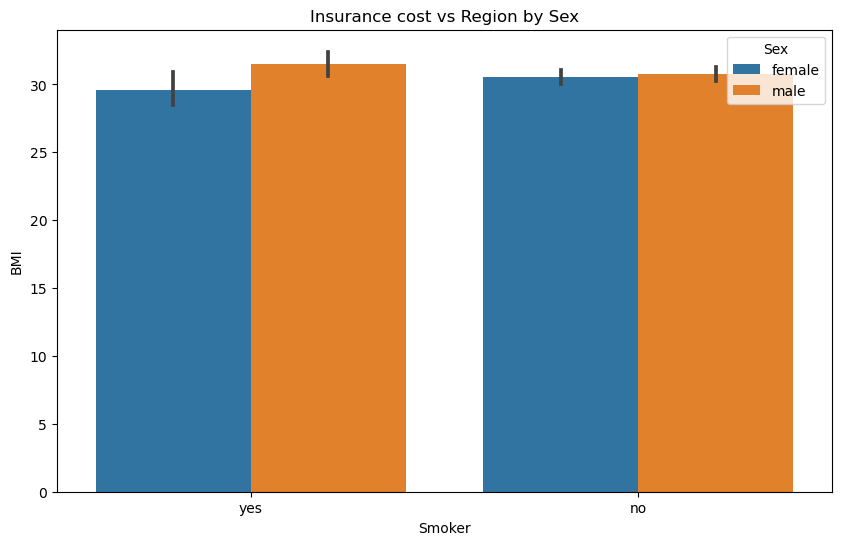

In [12]:
#Separate data per sex
plt.figure(figsize=(10, 6))
p = sns.barplot(x="smoker", y="bmi", hue="sex", data=us_insurance_df)
#Customize the chart
plt.title('Insurance cost vs Region by Sex')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.legend(title='Sex')
plt.show()

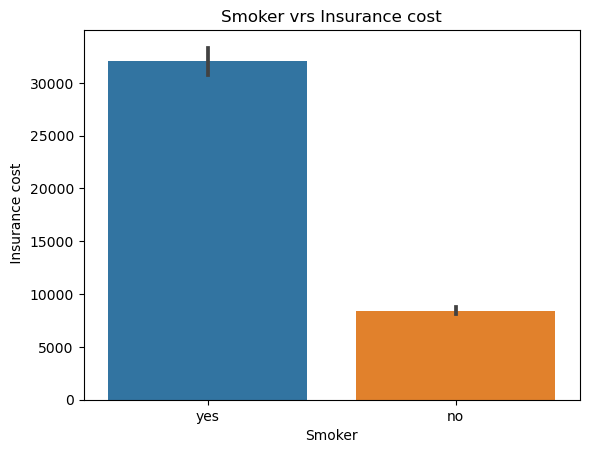

In [13]:
#To confirm the correlation on smoker and charges
p = sns.barplot(x="smoker", y="charges", data=us_insurance_df)
#Customize the chart
plt.title('Smoker vrs Insurance cost')
plt.xlabel('Smoker')
plt.ylabel(' Insurance cost')
plt.show()